In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 1000/1000 [00:00<00:00, 47560.94it/s]


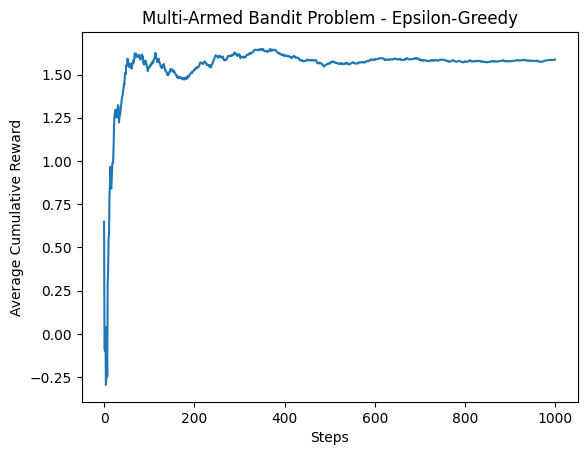

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the number of arms (bandits) and their true mean reward values
num_bandits = 10
true_mean_rewards = np.random.normal(size=num_bandits)

# Initialize variables for tracking rewards and action counts
estimated_rewards = np.zeros(num_bandits)
action_counts = np.zeros(num_bandits)

# Set the exploration-exploitation trade-off parameter (epsilon)
epsilon = 0.1

# Initialize a list to store the cumulative rewards for each step
cumulative_rewards = []

# Simulate bandit pulls
num_steps = 1000
for step in tqdm(range(num_steps)):
    # Epsilon-greedy action selection
    if np.random.random() < epsilon:
        # Explore: Choose a random action
        action = np.random.choice(num_bandits)
    else:
        # Exploit: Choose the action with the highest estimated reward
        action = np.argmax(estimated_rewards)

    # Simulate reward from the chosen action
    reward = np.random.normal(true_mean_rewards[action])

    # Update action counts
    action_counts[action] += 1

    # Update estimated rewards using sample-average method
    estimated_rewards[action] += (reward - estimated_rewards[action]) / action_counts[action]

    # Store cumulative reward for this step
    cumulative_rewards.append(reward)

# Plot the cumulative reward over time
plt.plot(np.cumsum(cumulative_rewards) / np.arange(1, num_steps + 1))
plt.xlabel('Steps')
plt.ylabel('Average Cumulative Reward')
plt.title('Multi-Armed Bandit Problem - Epsilon-Greedy')
plt.show()
